In [ ]:
%cd ../..

In [2]:
import numpy as np
import sympy as sy

from src import ContinuousModel
from src.identification import transient
from src.identification.utils import compare_models

In [3]:
def punto_uno(model, **kwargs):
    graphic = transient.identify_first_order(
        model,
        method='graphic',
        **kwargs
    )
    linear = transient.identify_first_order(
        model,
        method='linear',
        **kwargs
    )

    print(f'grafico: {graphic["equation"]}')
    print(f'lineal: {linear["equation"]}')
    
    if 'simulation_parameters' in kwargs:
        sim_kwargs = kwargs['simulation_parameters']
    else:
        sim_kwargs = {}

    compare_models({
        'real': model,
        'linear': linear['model'],
        'graphic': graphic['model']
    }, **sim_kwargs)

grafico: 1.99932907474422/(1.001001001001*s + 4)
lineal: 1.99932907474422*exp(-0.0653259368402936*s)/(0.889719746586425*s + 4)
Error linear =  0.0006783773941499893
Error graphic =  4.63221874744981e-08


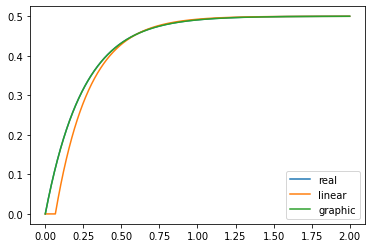

In [4]:
# 1.a
model = ContinuousModel([2], [1, 4])

punto_uno(
    model, cons=4,
    simulation_parameters={'time': np.linspace(0, 2, 1000)}
)

grafico: 3.99945384325128*exp(-2.2022022022022*s)/(1.001001001001*s + 0.5)
lineal: 3.99945384325128*exp(-2.69746848928306*s)/(0.907377676305304*s + 0.5)
Error linear =  0.13024259894454812
Error graphic =  3.7913581248032608e-06


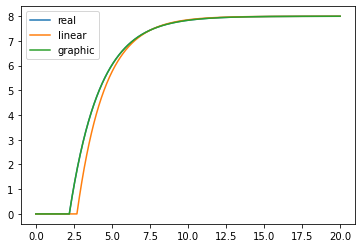

In [5]:
# 1. b
model = ContinuousModel([4], [1, 0.5], delay=2.2)
punto_uno(
    model, cons=0.5,
    simulation_parameters={'time': np.linspace(0, 20, 1000)}
)

grafico: 1.99503918623138*exp(-1.001001001001*s)/(2.98298298298298*s + 2)
lineal: 1.99503918623138*exp(-1.43260657403515*s)/(2.48995338924071*s + 2)
Error linear =  0.0035235772609558754
Error graphic =  2.277943515154495e-06


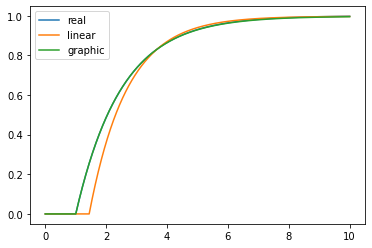

In [6]:
# 1. c
model = ContinuousModel([2], [3, 2], delay=1)
punto_uno(model, cons=2)

In [7]:
# 1. d
s = sy.symbols('s')
sy.expand((s + 0.5) * (s + 5), s)

s**2 + 5.5*s + 2.5

grafico: 0.794010713778581/(2.18218218218218*s + 1)
lineal: 0.794010713778581*exp(-0.745216170391341*s)/(1.56785595529057*s + 1)
Error linear =  0.0023384360791608282
Error graphic =  0.000281363001105442


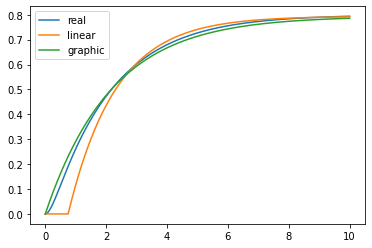

In [8]:
model = ContinuousModel([2], [1, 5.5, 2.5])
punto_uno(model)

In [9]:
# 1. e
s = sy.symbols('s')
sy.expand((s + 0.1) * (s + 1) * (s + 3), s)

s**3 + 4.1*s**2 + 3.4*s + 0.3

grafico: 3.65368805867509*exp(-3.12312312312312*s)/(10.3903903903904*s + 1)
lineal: 3.65368805867509*exp(-6.380220555987*s)/(8.17038169996871*s + 1)
Error linear =  0.04862717738514138
Error graphic =  0.0010528543242479863


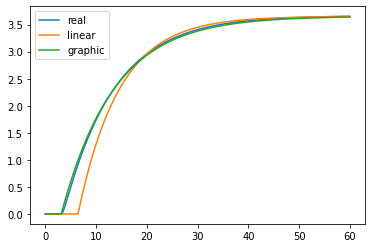

In [10]:
model = ContinuousModel([1, 1.1], [1, 4.1, 3.4, 0.3], delay=3.1)
punto_uno(
    model, 
    simulation_parameters={'time': np.linspace(0, 60, 1000)}
)

In [11]:
s = sy.symbols('s')
sy.expand((s + 1) * (s + 2), s)

s**2 + 3*s + 2

grafico: 0.999909202201596/(1.58158158158158*s + 1)
lineal: 0.999909202201596*exp(-0.706642314706713*s)/(0.948568151847521*s + 1)
Error linear =  0.002685274117945137
Error graphic =  0.0016698493701581443


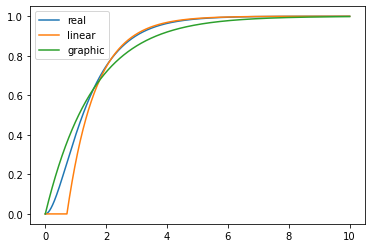

In [12]:
model = ContinuousModel([2], [1, 3, 2])
punto_uno(model)